In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [83]:
import numpy as np
import matplotlib.pyplot as plt

In [284]:
#system parameters
cooling_power = 0.002 #°C/s
heating_power = 0.008 #°C/s
delay = 15 #s

heating_noise_amp_max = 0.003
random_noise_amp_max = 0.00007


In [285]:
T_set = 31.
T_start = 23.

P = 2.254
I = 0.0014
D = 100. #120.348

num_steps = 60000

In [286]:
heater_T = np.zeros(num_steps) #here we can heat
sensor_T = np.zeros(num_steps+delay) #here we add noise, and this is what we react to

In [287]:
def simulate(P, I, D):
    dt = 0.75

    heater_T[0] = T_start
    sensor_T[0:delay+1] = T_start

    noise_power = 0.

    xP = 0.
    xI = 375.
    xD = 0.

    for i in range(1,num_steps):
        #update PID
        error = T_set - sensor_T[i-1]
        xD = error - xP
        if error*error < 0.5:
            xI += error
        else:
            xI = 330.
        xP = error
        output = P*xP + I*xI + D*xD
        if output > 1.:
            output = 1.
        if output < 0.:
            output = 0.

        #cooling_power = (heater_T[i] - 23.)/(31.-23.) * 0.002

        heater_T[i] = heater_T[i-1] + (output*(heating_power+cooling_power) - cooling_power)*dt*(1+(np.random.rand()-0.5)*0.05)

        noise_power += (np.random.rand()-0.5)*heating_noise_amp_max
        if noise_power > 0.01 or noise_power < -0.01:
            noise_power = 0.

        sensor_T[i+delay] = heater_T[i] + noise_power*dt + (np.random.rand()-0.5)*random_noise_amp_max
        
    return sensor_T

In [288]:
P = 2.254
I = 0.0014
D = 120.348

sensor_T_0 = simulate(P, I, D)

P = 0.
I = 0
D = 0.

sensor_T_1 = simulate(P, I, D)

<IPython.core.display.Javascript object>


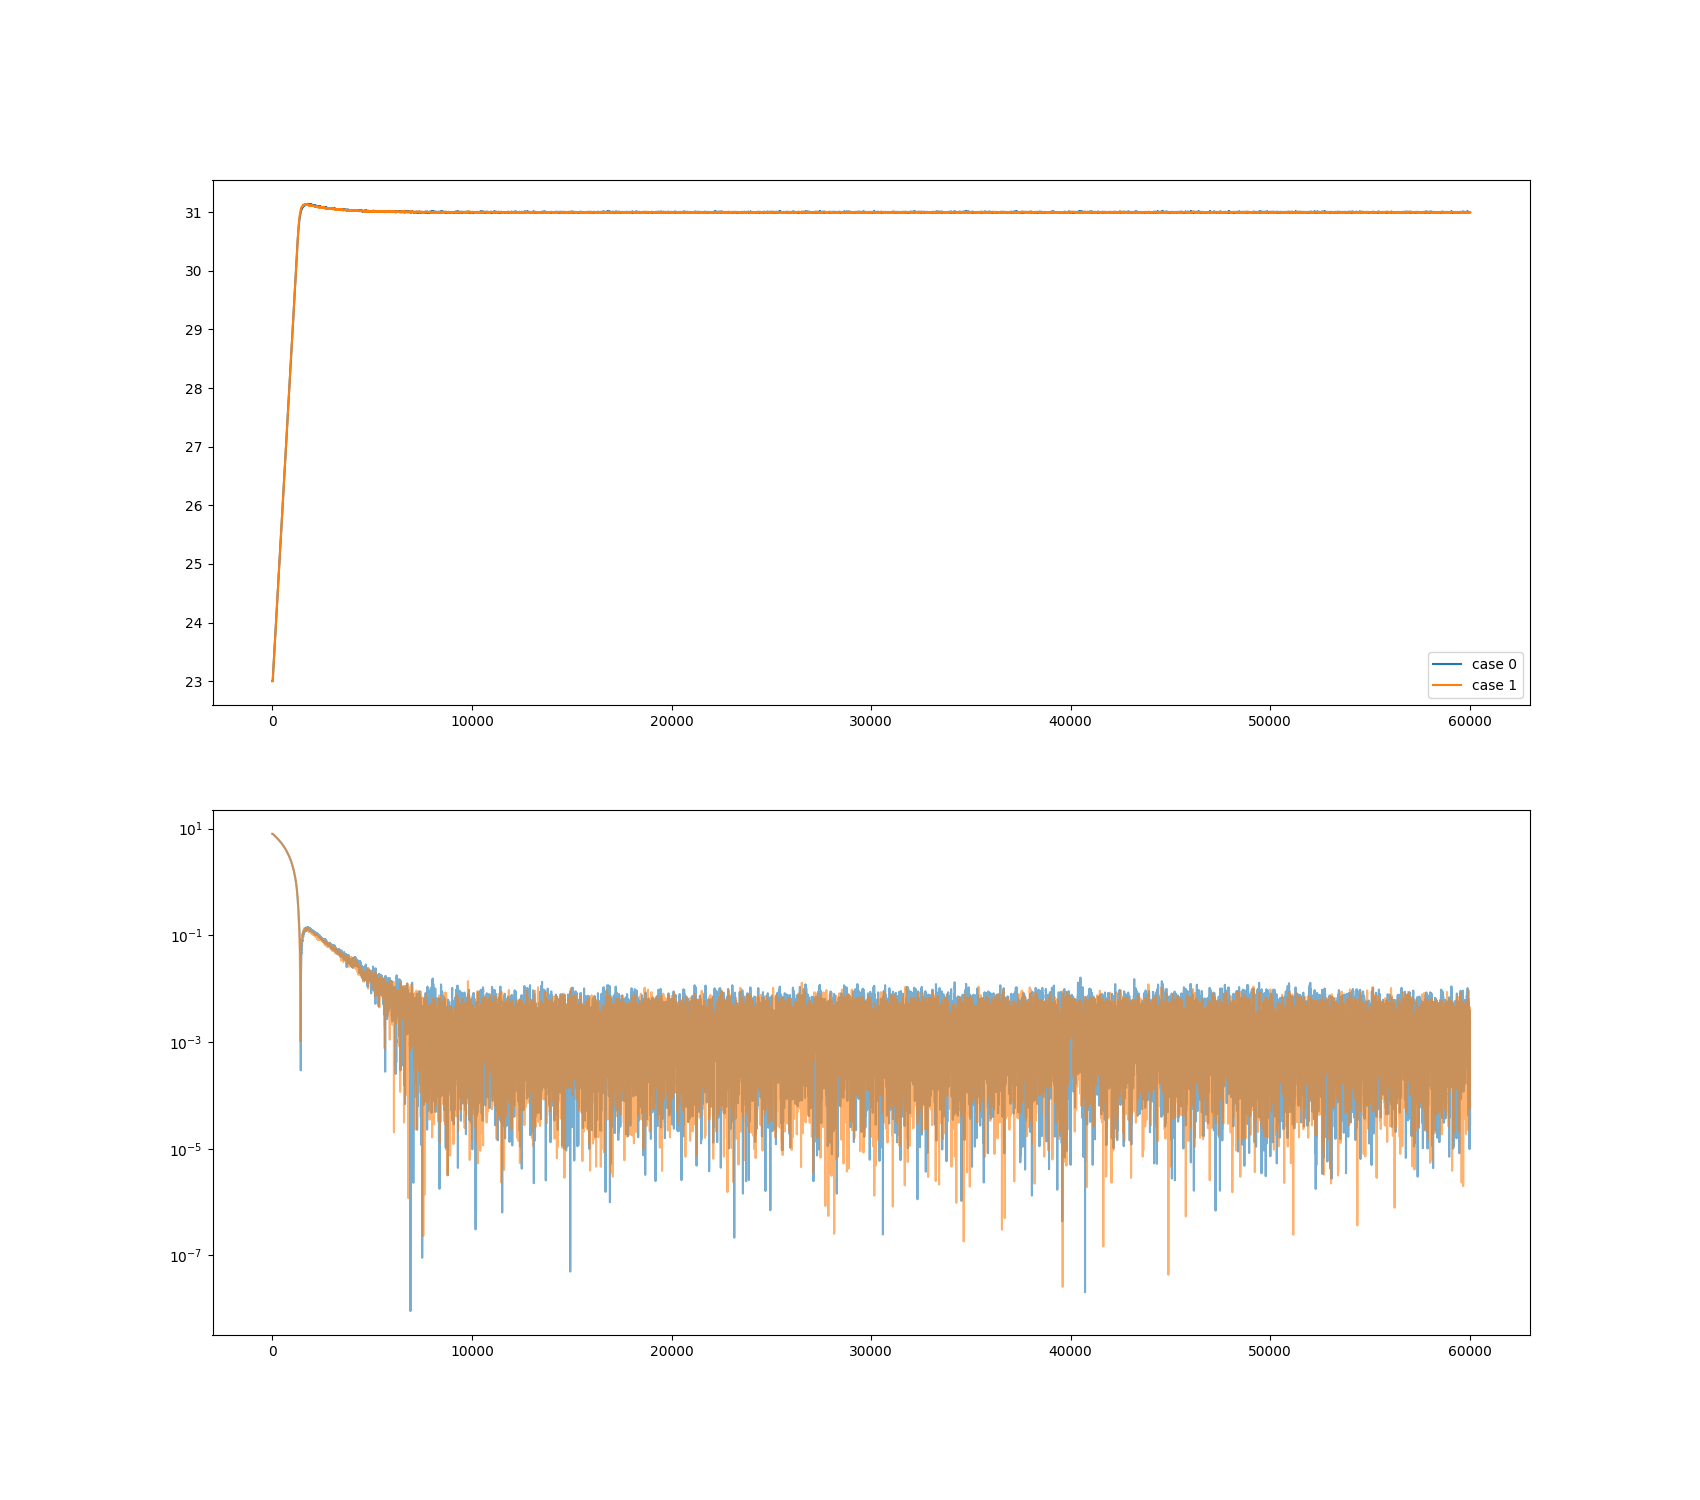

In [289]:
%matplotlib notebook
fig,axs = plt.subplots(2,1, figsize=(17,15))
P = 2.254
I = 0.0014
D = 120.348
sensor_T_0 = simulate(P, I, D)
axs[0].plot(sensor_T_0, label="case 0")
axs[1].semilogy(np.abs(sensor_T_0 - T_set), label="case 0", alpha=0.6)
P = 2.254
I = 0.0014
D = 80.
sensor_T_1 = simulate(P, I, D)
axs[0].plot(sensor_T_1, label="case 1")
axs[1].semilogy(np.abs(sensor_T_1 - T_set), label="case 1", alpha=0.6)
axs[0].legend()